# Multiple Input and Output Channels
A study convolution and review how the different operations change the relationship between input and output.

In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

/var/folders/h0/1qbsqb5s27qgqgpdmd83xrx00000gn/T/ipykernel_3669/3053585304.py:5: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import ndimage, misc


For each channel, a kernel is created, and each kernel performs a convolution independently. As a result, the number of outputs is equal to the number of channels.

In [2]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3)

In [3]:
# Pre-configured settings
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0]=Gx
conv1.state_dict()['weight'][1][0]=Gy
conv1.state_dict()['weight'][2][0]=torch.ones(3,3)

### Bias set to zero

In [4]:
conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

tensor([0., 0., 0.])

In [5]:
for x in conv1.state_dict()['weight']:
    print(x)

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


Create an input image to represent the input X:


In [6]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

### Plot the Image

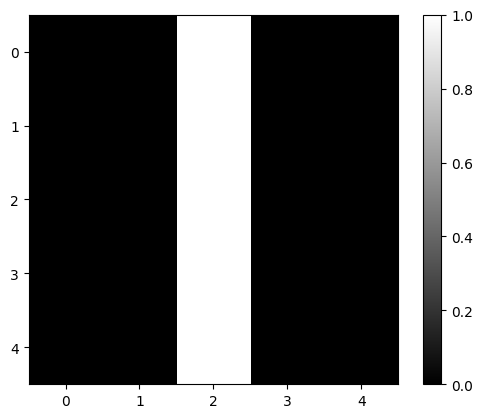

In [7]:
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

### Perform convolution using each channel

In [9]:
out=conv1(image)
out

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]],

         [[ 0.,  0.,  0.],
          [ 0.,  0.,  0.],
          [ 0.,  0.,  0.]],

         [[ 3.,  3.,  3.],
          [ 3.,  3.,  3.],
          [ 3.,  3.,  3.]]]], grad_fn=<ConvolutionBackward0>)

The result is a 1x3x3x3 tensor. This represents one sample with three channels, and each channel contains a 3x3 image.  The same rules that govern the shape of each image were discussed in the last section.


In [10]:
out.shape

torch.Size([1, 3, 3, 3])

tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


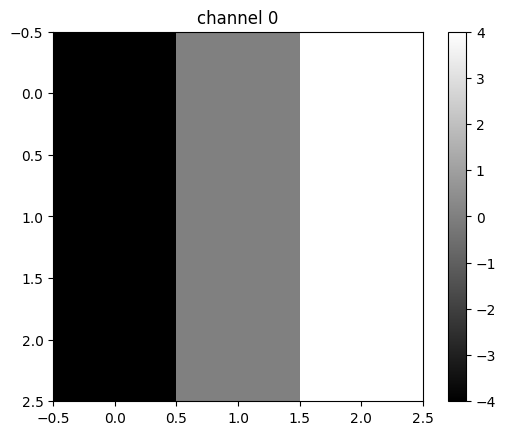

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


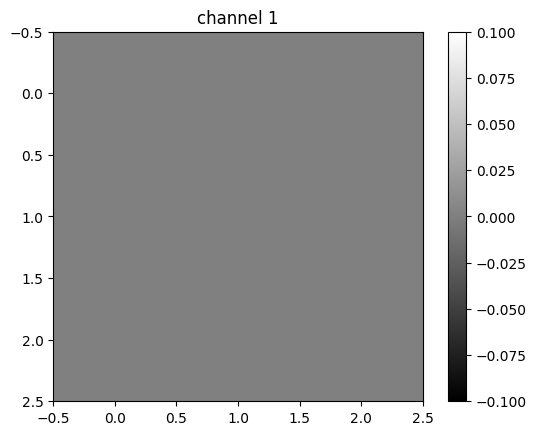

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


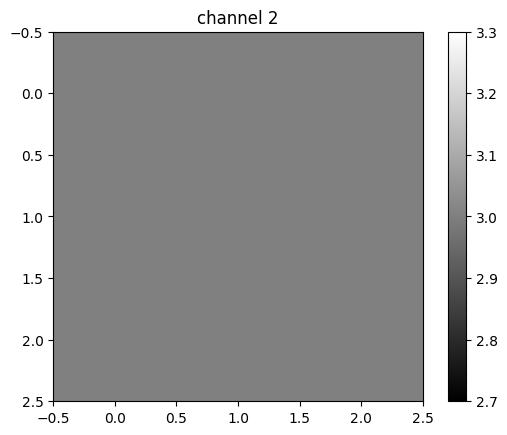

In [11]:
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


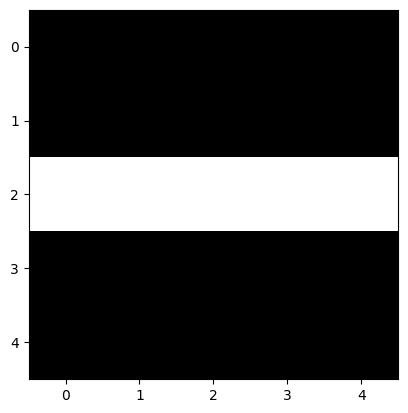

In [12]:
image1=torch.zeros(1,1,5,5)
image1[0,0,2,:]=1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


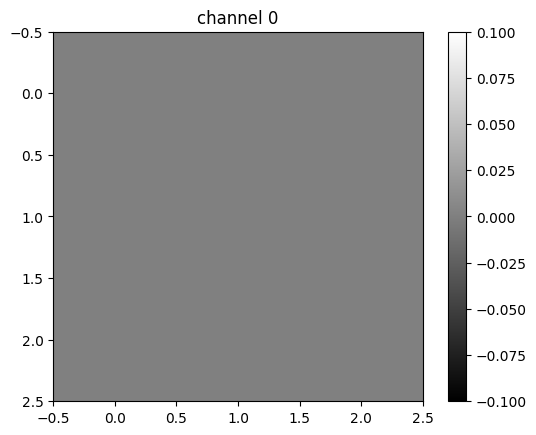

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<UnbindBackward0>)


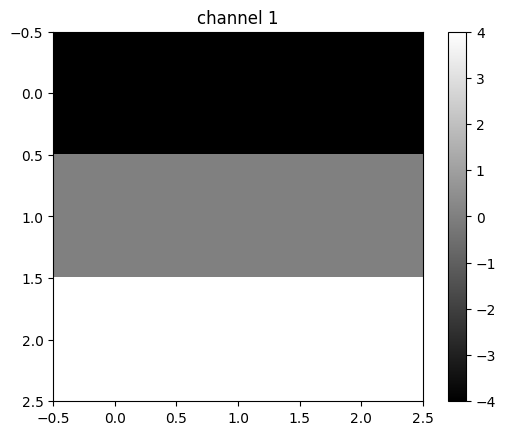

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


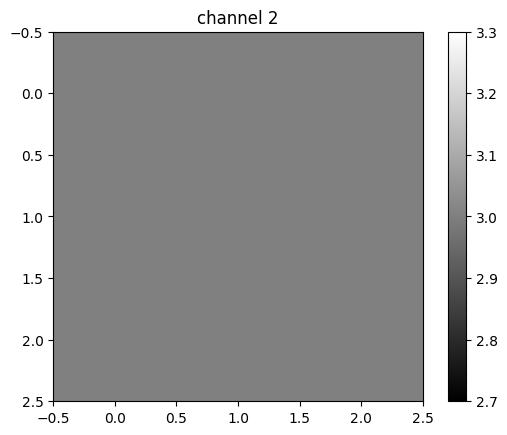

In [13]:
out1=conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [14]:
image2=torch.zeros(1,2,5,5)
image2[0,0,2,:]=-2
image2[0,1,2,:]=1
image2

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [-2., -2., -2., -2., -2.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


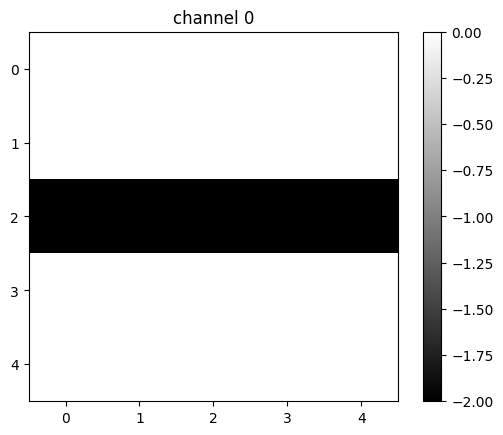

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


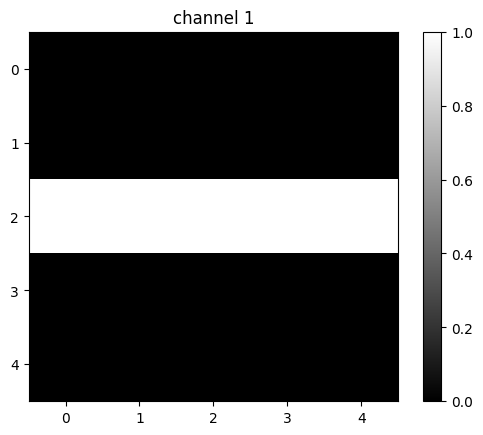

In [15]:
for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [16]:
conv3 = nn.Conv2d(in_channels=2, out_channels=1,kernel_size=3)

In [17]:
Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][0]=1*Gx1
conv3.state_dict()['weight'][0][1]=-2*Gx1
conv3.state_dict()['bias'][:]=torch.tensor([0.0])

In [18]:
conv3.state_dict()['weight']

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]])

In [19]:
conv3(image2)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)

## Multiple input and Multiple output channels
When using multiple inputs and outputs, a kernel is created for each input, and the process is repeated for each output. 


In [20]:
conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

In [21]:
conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

Create a two-channel image and plot the results: 



tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


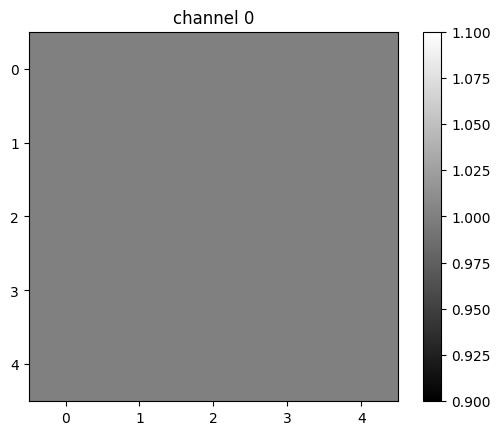

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


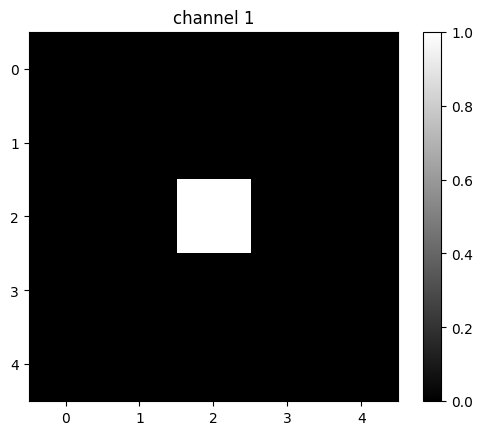

In [22]:
image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()